In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import sys
import glob
import itertools
import xarray as xr
import numpy as np
import pandas as pd
from rasterio import features, transform
import geopandas as gpd
from shapely.geometry import shape as shapelyshape

import pickle
import warnings
warnings.simplefilter("ignore")

In [2]:
GeofabricWB = pd.read_csv('./SH_Network_AHGFWaterbodyAttributeTable.csv')
WBAttrs = pd.read_csv('./DEAWaterbodiesAttributeTable.csv')

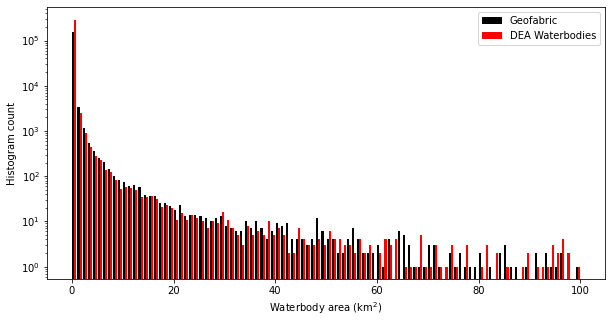

In [56]:
plt.figure(figsize=[10,5])
plt.hist([GeofabricWB['AlbersArea'] / 1000000, WBAttrs['area']/ 1000000], bins=100, range=(0, 100), 
         color = ['k', 'r'], log=True, label=['Geofabric', 'DEA Waterbodies']);
plt.legend(loc='upper right');
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.xlabel('Waterbody area (km$^2$)');
plt.ylabel('Histogram count');

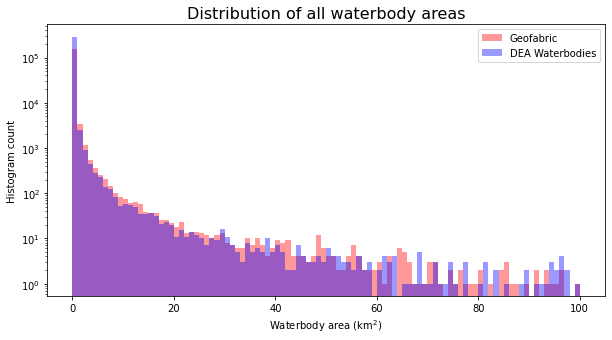

In [3]:
plt.figure(figsize=[10,5])
plt.hist(GeofabricWB['AlbersArea']/ 1000000, bins=100, range=(0, 100), 
         color = 'r', log=True, label='Geofabric', alpha=0.4);
plt.hist(WBAttrs['area']/ 1000000, bins=100, range=(0, 100), 
         color = 'b', log=True, label='DEA Waterbodies', alpha=0.4);
plt.legend(loc='upper right');
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.xlabel('Waterbody area (km$^2$)');
plt.ylabel('Histogram count');
plt.title('Distribution of all waterbody areas', fontsize=16)
plt.savefig('WaterbodySizeHistogram.jpg')

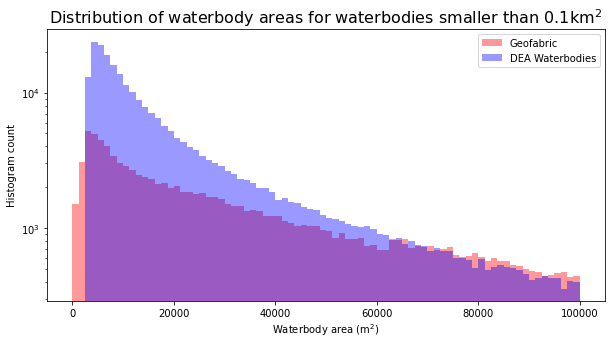

In [4]:
plt.figure(figsize=[10,5])
plt.hist(GeofabricWB['AlbersArea'], bins=80, range=(0, 100000), 
         color = 'r', log=True, label='Geofabric', alpha=0.4);
plt.hist(WBAttrs['area'], bins=80, range=(0, 100000), 
         color = 'b', log=True, label='DEA Waterbodies', alpha=0.4);
plt.legend(loc='upper right');
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.xlabel('Waterbody area (m$^2$)');
plt.ylabel('Histogram count');
plt.title('Distribution of waterbody areas for waterbodies smaller than 0.1km$^2$', fontsize=16)
plt.savefig('WaterbodySizeHistogramSmall.jpg')

## Time first observed analysis

In [2]:
FirstObs = pd.read_csv('PaperData/AusWaterBodiesFINALTimeFirst50pcState.csv')

In [10]:
FirstObs['Time_First'] = pd.to_datetime(FirstObs['Time_First'], format="%Y-%m-%d", errors='coerce')

In [11]:
FirstObs

,area,perimeter,UID,Time_First,STATE,Shape_Leng,Shape_Area
0,1.187495e+04,5.497914e+02,q9cusmx7n,1988-06-02,WA,5.500000e+02,1.187500e+04
1,3.500004e+04,1.598716e+03,q9cuu1dbv,1988-06-02,WA,1.600000e+03,3.500000e+04
2,4.999966e+03,4.004373e+02,q9cuuc4dp,1996-10-07,WA,4.000000e+02,5.000000e+03
3,6.250030e+03,3.497868e+02,q9cuv3u3x,1986-08-16,WA,3.500000e+02,6.250000e+03
4,5.000022e+03,3.000032e+02,q9cuv6j1r,1986-08-16,WA,3.000000e+02,5.000000e+03
...,...,...,...,...,...,...,...
295901,5.062500e+04,1.051454e+03,rnj90n5ef,1988-06-09,QLD,1.050000e+03,5.062500e+04
295902,1.612184e+09,1.937612e+06,r42f3t8r0,1988-06-16,SA,1.938015e+06,1.612169e+09
295903,5.073125e+07,8.532860e+04,qu0tbwjqr,1994-03-03,WA,8.514678e+04,5.073126e+07
295904,3.877979e+07,9.934515e+04,r49b5nmwq,1988-04-06,SA,9.934631e+04,3.878000e+07
